In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../data_ml/house_price.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.shape

(1460, 81)

In [6]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

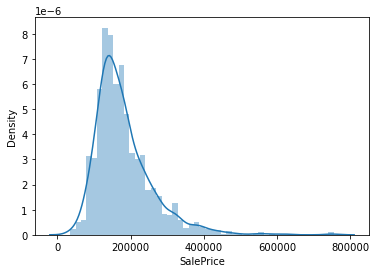

In [7]:
sns.distplot(df['SalePrice'])

In [8]:
# nan값의 수 기준 상위 5개의 칼럼을 삭제..
# 나머지 칼럼의 칼럼값의 평균값으로 nan값을 채우시요...

In [9]:
drop_idx = df.isnull().sum().sort_values(ascending=False)[:5].index
df.drop(drop_idx, axis=1, inplace=True)

In [10]:
df.fillna(df.mean(), inplace=True)

In [11]:
df.drop('Id', axis=1, inplace=True)

In [12]:
df.isnull().sum().sort_values()

MSSubClass        0
SaleCondition     0
HeatingQC         0
CentralAir        0
1stFlrSF          0
                 ..
BsmtFinType2     38
GarageQual       81
GarageCond       81
GarageFinish     81
GarageType       81
Length: 75, dtype: int64

In [13]:
col_dtypes = df.dtypes == 'object'
col_dtypes[col_dtypes]

MSZoning         True
Street           True
LotShape         True
LandContour      True
Utilities        True
LotConfig        True
LandSlope        True
Neighborhood     True
Condition1       True
Condition2       True
BldgType         True
HouseStyle       True
RoofStyle        True
RoofMatl         True
Exterior1st      True
Exterior2nd      True
MasVnrType       True
ExterQual        True
ExterCond        True
Foundation       True
BsmtQual         True
BsmtCond         True
BsmtExposure     True
BsmtFinType1     True
BsmtFinType2     True
Heating          True
HeatingQC        True
CentralAir       True
Electrical       True
KitchenQual      True
Functional       True
GarageType       True
GarageFinish     True
GarageQual       True
GarageCond       True
PavedDrive       True
SaleType         True
SaleCondition    True
dtype: bool

In [14]:
df[col_dtypes[col_dtypes].index].isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [15]:
# df에서 문자열 칼럼을 numeric type으로 모두 바꾸시오..

In [16]:
df_ohe = pd.get_dummies(df)
df_ohe.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [17]:
(df_ohe.dtypes == 'object').sum()

0

In [18]:
df_ohe.isnull().sum().sum()

0

In [19]:
df_ohe.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [20]:
df_ohe.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [21]:
# x,y divide

In [22]:
y = df_ohe.SalePrice
x = df_ohe.drop('SalePrice', axis=1)

In [23]:
# train, test split

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=111, test_size=0.2)

In [25]:
# Linear Regression 모델을 생성하고 평가하시오...(LinearRegression, Ridge, Lasso)

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()

In [29]:
models = [lr, rid, las]

In [30]:
for m in models:
    m.fit(x_train, y_train)
    preds = m.predict(x_test)
    accuracy = m.score(x_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    
    print('--------')
    print(m.__class__.__name__)
    print('accuracy :', accuracy)
    print('rmse :', rmse)

--------
LinearRegression
accuracy : 0.8687479259359544
rmse : 30945.303958794877
--------
Ridge
accuracy : 0.8668559502795903
rmse : 31167.54151341282
--------
Lasso
accuracy : 0.8865564398427328
rmse : 28769.45197160167


In [31]:
# scale을 조절한 후 linear model로 예측하고 모델을 평가하시오..

In [32]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [33]:
# scaler = MinMaxScaler()
scaler = StandardScaler()

In [34]:
scaler.fit(x_train)

StandardScaler()

In [35]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [36]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()

models = [lr, rid, las]

for m in models:
    m.fit(x_train_scaled, y_train)
    preds = m.predict(x_test_scaled)
    accuracy = m.score(x_test_scaled, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    
    print('--------')
    print(m.__class__.__name__)
    print('accuracy :', accuracy)
    print('rmse :', rmse)
    

--------
LinearRegression
accuracy : -3.1062389164206913e+25
rmse : 4.760571514816402e+17
--------
Ridge
accuracy : 0.8837775872996746
rmse : 29119.680718260326
--------
Lasso
accuracy : 0.8859115024794095
rmse : 28851.11459817517


In [37]:
# y target의 분포 정규화

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

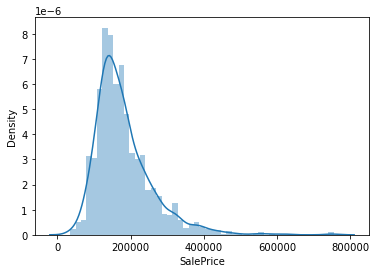

In [38]:
sns.distplot(y)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

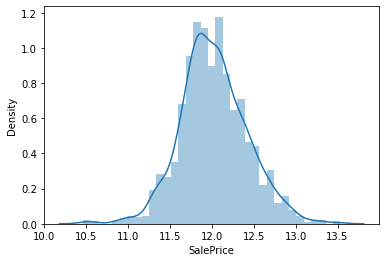

In [39]:
sns.distplot(np.log1p(y))

In [63]:
from sklearn.metrics import r2_score

In [66]:
y_log = np.log1p(y)
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

y_train_log

# lr = LinearRegression()
rid = Ridge()
las = Lasso()

models = [rid, las]

for m in models:
    m.fit(x_train_scaled, y_train_log)
    preds_log = m.predict(x_test_scaled)
    preds = np.expm1(preds_log)
    accuracy = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    
    print('--------')
    print(m.__class__.__name__)
#     print('accuracy :', accuracy)
    print('rmse :', rmse)

--------
Ridge
rmse : 22222.007639610878
--------
Lasso
rmse : 87134.73914256188


In [41]:
# GridSearchCV

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
rid_params = {'alpha': [ 20, 30, 50, 100, 200, 300, 500, 700, 1000]}
las_params = {'alpha': [0.1, 0.5, 1.5, 10, 20, 50, 100, 200, 300, 500, 700]}

In [44]:
rid = Ridge()
las = Lasso()

grid = GridSearchCV(rid, param_grid = rid_params, refit=True, verbose=True)
grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [20, 30, 50, 100, 200, 300, 500, 700, 1000]},
             verbose=True)

In [45]:
grid.best_params_

{'alpha': 700}

In [46]:
grid.best_score_

0.8122212678112785

In [47]:
grid = GridSearchCV(las, param_grid = las_params, refit=True, verbose=True)
grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.5, 1.5, 10, 20, 50, 100, 200, 300,
                                   500, 700]},
             verbose=True)

In [48]:
grid.best_params_

{'alpha': 700}

In [49]:
grid.best_score_

0.7850278247978013

In [50]:
rid = Ridge(alpha=30)
rid.fit(x_train_scaled, y_train)
rid.score(x_test_scaled, y_test)

0.8850168401848109

In [51]:
rid = Ridge(alpha=40)
rid.fit(x_train_scaled, y_train)
rid.score(x_test_scaled, y_test)

0.885085349032203

In [52]:
# coef size 

In [53]:
y = df.SalePrice
x = df.drop('SalePrice', axis=1)

In [54]:
x_ohe = pd.get_dummies(x)

In [55]:
x_ohe

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [56]:
scaler = MinMaxScaler()

In [67]:
x_ohe_scaled = scaler.fit_transform(x_ohe)

In [68]:
x_ohe_scaled = pd.DataFrame(x_ohe_scaled, columns = x_ohe.columns)
x_ohe_scaled.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [69]:
x_train, x_test, y_train, y_test = train_test_split(x_ohe_scaled, y, random_state=111)

In [70]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()

models = [lr, rid, las]
trained_models = []

for m in models:
    m.fit(x_train, y_train)
    trained_models.append(m)
    preds = m.predict(x_test)
    accuracy = m.score(x_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    
    print('--------')
    print(m.__class__.__name__)
    print('accuracy :', accuracy)
    print('rmse :', rmse)

--------
LinearRegression
accuracy : -8.42689223767062e+19
rmse : 806984410714314.0
--------
Ridge
accuracy : 0.858354272612248
rmse : 33085.154305488846
--------
Lasso
accuracy : 0.880114351809289
rmse : 30437.92361830004


In [75]:
trained_models

[LinearRegression(), Ridge(), Lasso()]

In [77]:
# feat_imp = pd.Series(trained_models[0].coef_, index=x_ohe_scaled.columns).sort_values(ascending=False)
# feat_imp.head(10)

In [78]:
# feat_imp.head(30).plot(kind='bar', figsize=(10,2))

<AxesSubplot:>

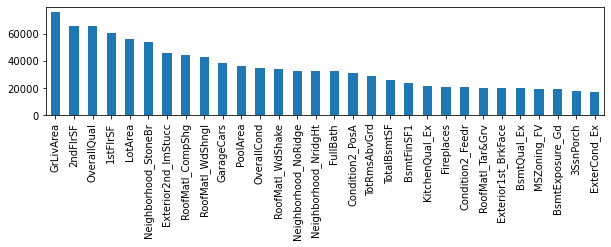

In [74]:
feat_imp = pd.Series(trained_models[1].coef_, index=x_ohe_scaled.columns).sort_values(ascending=False)
feat_imp.head(30).plot(kind='bar', figsize=(10,2))

<AxesSubplot:>

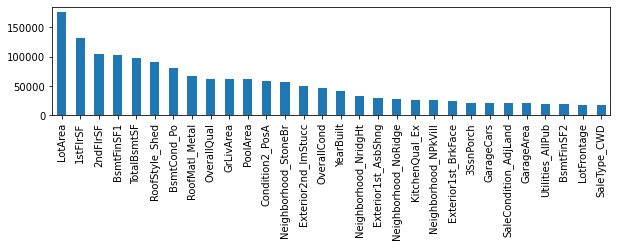

In [79]:
feat_imp = pd.Series(trained_models[2].coef_, index=x_ohe_scaled.columns).sort_values(ascending=False)
feat_imp.head(30).plot(kind='bar', figsize=(10,2))

In [ ]:
# xgboostregressor, lgbmregressor, randomforestregressor

In [ ]:
# null
# scaling
# get_dummies()

# gridsearch..